In [2]:
import pandas as pd
import scipy as sp
from scipy.sparse import diags
import numpy as np
from numpy import linalg as LA
import sys

import matplotlib.pyplot as plt

#importing seaborn for plotting
import seaborn as sns

#for plotting purposes
%pylab inline
sns.set_style('ticks')
sns.set_context('paper')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import matplotlib as mpl

from scipy.signal import find_peaks

# mpl.rcParams
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['figure.figsize'] = [8, 16/3]

Populating the interactive namespace from numpy and matplotlib


### converting ladder to nts

In [3]:
ls

Convert_ladders_Run6.ipynb
Eukaryote Total RNA Nano_2020-10-21_17-06-53.xml
Eukaryote Total RNA Nano_2020-10-21_17-06-53_Ladder.csv
Eukaryote Total RNA Nano_2020-10-21_17-06-53_Results.csv
Eukaryote Total RNA Nano_2020-10-21_17-06-53_Sample1.csv
Eukaryote Total RNA Nano_2020-10-21_17-06-53_Sample10.csv
Eukaryote Total RNA Nano_2020-10-21_17-06-53_Sample11.csv
Eukaryote Total RNA Nano_2020-10-21_17-06-53_Sample12.csv
Eukaryote Total RNA Nano_2020-10-21_17-06-53_Sample2.csv
Eukaryote Total RNA Nano_2020-10-21_17-06-53_Sample3.csv
Eukaryote Total RNA Nano_2020-10-21_17-06-53_Sample4.csv
Eukaryote Total RNA Nano_2020-10-21_17-06-53_Sample5.csv
Eukaryote Total RNA Nano_2020-10-21_17-06-53_Sample6.csv
Eukaryote Total RNA Nano_2020-10-21_17-06-53_Sample7.csv
Eukaryote Total RNA Nano_2020-10-21_17-06-53_Sample8.csv
Eukaryote Total RNA Nano_2020-10-21_17-06-53_Sample9.csv
Icon?


In [4]:
filename = 'Eukaryote Total RNA Nano_2020-10-21_17-06-53'

Text(0.5, 1.0, 'Ladder Peaks: Eukaryote Total RNA Nano_2020-10-21_17-06-53')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'FU')

(array([10., 20., 30., 40., 50., 60., 70., 80.]),
 <a list of 8 Text major ticklabel objects>)

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.]),
 <a list of 7 Text major ticklabel objects>)

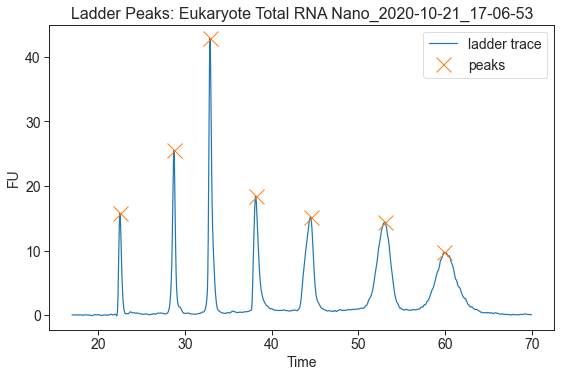

In [5]:
ladder_dict = {}
ladder_times = {}
ladder_values = {}
    
ladder_df = pd.read_csv(filename+'_Ladder.csv', skiprows=17)[:-1]
ladder_time = np.array(ladder_df['Time'].astype(float))
ladder_value = np.array(ladder_df['Value'].astype(float))


peaks,_ = find_peaks(ladder_value, height=7.5, distance=15)
ladder_dict = list(peaks[:6])

plot(ladder_time, ladder_value, label='ladder trace')
plot(ladder_time[peaks], ladder_value[peaks], 'x', label='peaks', markersize=15)
title('Ladder Peaks: '+filename, fontsize=16)
legend(fontsize=14)
xlabel('Time', fontsize=14)
ylabel('FU', fontsize=14)
xticks(fontsize=14)
yticks(fontsize=14)

tight_layout()

savefig(filename+'_ladder.png', dpi=300)

Text(0, 0.5, 'Calculated nts (from time)')

Text(0.5, 0, 'Ladder nts')

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.,
        4000., 4500.]),
 <a list of 11 Text major ticklabel objects>)

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.,
        4000., 4500.]),
 <a list of 11 Text major ticklabel objects>)

Text(0.5, 1.0, 'Ladder polynomial fit: Eukaryote Total RNA Nano_2020-10-21_17-06-53')

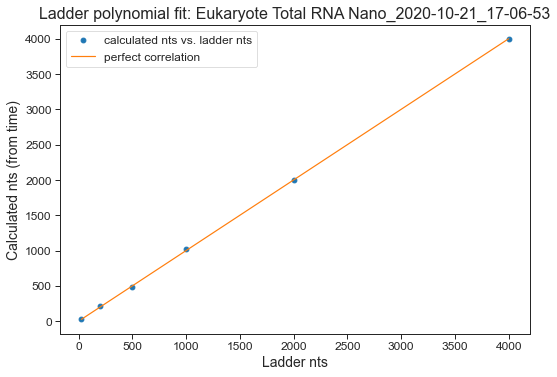

In [6]:
peak_times = ladder_time[ladder_dict]
# peak_times
peak_fu = np.array([25, 200, 500, 1000, 2000, 4000])

ladder_fit = np.polyfit(x=peak_times, y = peak_fu, deg = 4)
lf = np.poly1d(ladder_fit)
ladder_nts = lf

plot(peak_fu, lf(peak_times), 'o',label='calculated nts vs. ladder nts')
plot(peak_fu, peak_fu,label='perfect correlation')
ylabel('Calculated nts (from time)', fontsize=14)
xlabel('Ladder nts', fontsize=14)
yticks(fontsize=12)
xticks(fontsize=12)
title('Ladder polynomial fit: '+filename, fontsize=16)
legend(fontsize=12)
tight_layout()
savefig(filename+'_ladder_fit.png', dpi=300)

In [7]:
ls

Convert_ladders_Run6.ipynb
Eukaryote Total RNA Nano_2020-10-21_17-06-53.xml
Eukaryote Total RNA Nano_2020-10-21_17-06-53_Ladder.csv
Eukaryote Total RNA Nano_2020-10-21_17-06-53_Results.csv
Eukaryote Total RNA Nano_2020-10-21_17-06-53_Sample1.csv
Eukaryote Total RNA Nano_2020-10-21_17-06-53_Sample10.csv
Eukaryote Total RNA Nano_2020-10-21_17-06-53_Sample11.csv
Eukaryote Total RNA Nano_2020-10-21_17-06-53_Sample12.csv
Eukaryote Total RNA Nano_2020-10-21_17-06-53_Sample2.csv
Eukaryote Total RNA Nano_2020-10-21_17-06-53_Sample3.csv
Eukaryote Total RNA Nano_2020-10-21_17-06-53_Sample4.csv
Eukaryote Total RNA Nano_2020-10-21_17-06-53_Sample5.csv
Eukaryote Total RNA Nano_2020-10-21_17-06-53_Sample6.csv
Eukaryote Total RNA Nano_2020-10-21_17-06-53_Sample7.csv
Eukaryote Total RNA Nano_2020-10-21_17-06-53_Sample8.csv
Eukaryote Total RNA Nano_2020-10-21_17-06-53_Sample9.csv
Eukaryote Total RNA Nano_2020-10-21_17-06-53_ladder.png
Eukaryote Total RNA Nano_2020-10-21_17-06-53_ladder_fit.png
Icon?


### converting samples to nucleotides as well

In [8]:
samples = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
num_samples = len(samples)

ncolumns=3
nrows = math.ceil(num_samples/ncolumns)

figure(figsize=(ncolumns*6, nrows*4+3))

samples_dict = {}
for i, sample in enumerate(samples):
    sample_df = pd.read_csv(filename+'_Sample'+sample+'.csv', skiprows=17)[:-1]
    samples_dict[sample] = sample_df
    times = np.array(sample_df['Time'].astype(float))
    sample_df['Nucleotides'] = ladder_nts(times)
    sample_df.to_csv(filename+'_'+sample+'_nts.csv')
    
# for i, sample in enumerate(ladder_nts):
#     nt_array = ladder_nts[sample](ladder_times[sample])
    
#     peaks_store = []
# #     heights_store = []
    
#     subplot(nrows,ncolumns,i+1)
    
#     #read in dataframe for per sample here
#     sample_df = samples_dict[sample]
    
#     timepoints = [0,0.5,1.0,1.5,2,3,4,5,18,24]
    
#     for i,time in enumerate(timepoints):
#         data = np.array(sample_df[sample_df['Timepoint']==time]['Value'])
        
#         peaks, _ = find_peaks(data, distance=50, height=2.5)
# #         peaks_store.append(peaks)
#         heights_store.append(data[peaks])

#         plot(nt_array[:int(len(nt_array)/2)],data[:int(len(nt_array)/2)], label=time)
#         plot(np.array(nt_array)[peaks], data[peaks], 'x',markersize=6)
#         ylabel('Flourescence Units', fontsize=14)
#         xlabel('Nucleotides', fontsize=14)
#         legend()
#         title(sample, fontweight='bold')
#         tight_layout()

# for sample in samples:
    

<Figure size 1296x1368 with 0 Axes>

<Figure size 1296x1368 with 0 Axes>